<a href="https://colab.research.google.com/github/Morfinic/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

Numpy: 1.21.6
Pandas: 1.3.5


# **Załadowanie danych**

In [17]:
def fetch_financial_data(company="AMZN"):
    import pandas_datareader as web
    return web.DataReader(name=company, data_source="stooq")

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-08-01 to 2017-08-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,134.9600,138.8339,133.5100,135.3900,76846908
2022-07-29,134.9000,137.6500,132.4100,134.9500,148892889
2022-07-28,121.5700,122.8400,118.0800,122.2800,82245543
2022-07-27,117.3100,121.9000,117.1600,120.9700,61582015
2022-07-26,115.7900,118.1500,114.5300,114.8100,67075064
...,...,...,...,...,...
2017-08-09,49.1300,49.4000,48.7635,49.1005,71362860
2017-08-08,49.7175,49.8140,49.2895,49.4920,57790300
2017-08-07,49.5325,49.7500,49.3570,49.6135,53405640


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,134.96,138.8339,133.51,135.39,76846908
2022-07-29,134.90,137.6500,132.41,134.95,148892889
2022-07-28,121.57,122.8400,118.08,122.28,82245543
2022-07-27,117.31,121.9000,117.16,120.97,61582015
2022-07-26,115.79,118.1500,114.53,114.81,67075064


In [6]:
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,134.96,138.8339,133.51,135.39,76846908
2022-07-29,134.90,137.6500,132.41,134.95,148892889


In [8]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-09,49.1300,49.4000,48.7635,49.1005,71362860
2017-08-08,49.7175,49.8140,49.2895,49.4920,57790300
2017-08-07,49.5325,49.7500,49.3570,49.6135,53405640
2017-08-04,49.4840,49.5836,49.1000,49.3705,54544520
2017-08-03,49.9735,49.9750,49.2295,49.3460,65060280


In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [20]:
df.columns = [
    col.lower()
    for col in df.columns
    ]
df.head()

,open,high,low,close,volume
Date,,,,,
2022-08-01,134.96,138.8339,133.51,135.39,76846908
2022-07-29,134.90,137.6500,132.41,134.95,148892889
2022-07-28,121.57,122.8400,118.08,122.28,82245543
2022-07-27,117.31,121.9000,117.16,120.97,61582015
2022-07-26,115.79,118.1500,114.53,114.81,67075064


In [13]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,114.980933,116.307937,113.507927,114.924711,8.638596e+07
std,39.898618,40.376186,39.355117,39.825216,4.101630e+07
min,47.000000,47.431500,46.587500,46.930000,1.762674e+07
25%,85.225500,86.170500,84.217000,84.990000,5.876064e+07
50%,98.465000,99.651000,97.200500,98.637000,7.496474e+07
75%,158.338000,159.938000,156.250000,158.100000,1.022881e+08
max,187.200000,188.654000,184.840000,186.570000,3.310520e+08


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.149809e+02,3.989862e+01,4.700000e+01,8.522550e+01,9.846500e+01,1.583380e+02,1.872000e+02
high,1257.0,1.163079e+02,4.037619e+01,4.743150e+01,8.617050e+01,9.965100e+01,1.599380e+02,1.886540e+02
low,1257.0,1.135079e+02,3.935512e+01,4.658750e+01,8.421700e+01,9.720050e+01,1.562500e+02,1.848400e+02
close,1257.0,1.149247e+02,3.982522e+01,4.693000e+01,8.499000e+01,9.863700e+01,1.581000e+02,1.865700e+02
volume,1257.0,8.638596e+07,4.101630e+07,1.762674e+07,5.876064e+07,7.496474e+07,1.022881e+08,3.310520e+08


# **Sekekcja kolumn**

In [18]:
df = df.head(10)
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,134.960,138.8339,133.5100,135.39,76846908
2022-07-29,134.900,137.6500,132.4100,134.95,148892889
2022-07-28,121.570,122.8400,118.0800,122.28,82245543
2022-07-27,117.310,121.9000,117.1600,120.97,61582015
2022-07-26,115.790,118.1500,114.5300,114.81,67075064
2022-07-25,122.695,123.6400,120.0300,121.14,50221259
2022-07-22,125.010,125.5000,121.3504,122.42,51463797
2022-07-21,123.200,124.8500,121.2600,124.63,60239892
2022-07-20,118.615,123.4750,118.3200,122.77,71268322


In [21]:
df["open"]

Date
2022-08-01    134.960
2022-07-29    134.900
2022-07-28    121.570
2022-07-27    117.310
2022-07-26    115.790
2022-07-25    122.695
2022-07-22    125.010
2022-07-21    123.200
2022-07-20    118.615
2022-07-19    115.700
Name: open, dtype: float64

In [22]:
df.open

Date
2022-08-01    134.960
2022-07-29    134.900
2022-07-28    121.570
2022-07-27    117.310
2022-07-26    115.790
2022-07-25    122.695
2022-07-22    125.010
2022-07-21    123.200
2022-07-20    118.615
2022-07-19    115.700
Name: open, dtype: float64

In [25]:
df[["open", "close"]]

,open,close
Date,,
2022-08-01,134.960,135.39
2022-07-29,134.900,134.95
2022-07-28,121.570,122.28
2022-07-27,117.310,120.97
2022-07-26,115.790,114.81
2022-07-25,122.695,121.14
2022-07-22,125.010,122.42
2022-07-21,123.200,124.63
2022-07-20,118.615,122.77


In [28]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2022-08-01,134.960,135.39
2022-07-29,134.900,134.95
2022-07-28,121.570,122.28
2022-07-27,117.310,120.97
2022-07-26,115.790,114.81
2022-07-25,122.695,121.14
2022-07-22,125.010,122.42
2022-07-21,123.200,124.63
2022-07-20,118.615,122.77


In [29]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-08-01,135.39,76846908
2022-07-29,134.95,148892889
2022-07-28,122.28,82245543
2022-07-27,120.97,61582015
2022-07-26,114.81,67075064
2022-07-25,121.14,50221259
2022-07-22,122.42,51463797
2022-07-21,124.63,60239892
2022-07-20,122.77,71268322


In [30]:
df.iloc[:, -1]

Date
2022-08-01     76846908
2022-07-29    148892889
2022-07-28     82245543
2022-07-27     61582015
2022-07-26     67075064
2022-07-25     50221259
2022-07-22     51463797
2022-07-21     60239892
2022-07-20     71268322
2022-07-19     60990043
Name: volume, dtype: int64

In [31]:
df.iloc[:, [-1]]

,volume
Date,
2022-08-01,76846908
2022-07-29,148892889
2022-07-28,82245543
2022-07-27,61582015
2022-07-26,67075064
2022-07-25,50221259
2022-07-22,51463797
2022-07-21,60239892
2022-07-20,71268322


In [33]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2022-08-01,133.5100,135.39,76846908
2022-07-29,132.4100,134.95,148892889
2022-07-28,118.0800,122.28,82245543
2022-07-27,117.1600,120.97,61582015
2022-07-26,114.5300,114.81,67075064
2022-07-25,120.0300,121.14,50221259
2022-07-22,121.3504,122.42,51463797
2022-07-21,121.2600,124.63,60239892
2022-07-20,118.3200,122.77,71268322


# **Selekcja wierszy**

In [34]:
df

,open,high,low,close,volume
Date,,,,,
2022-08-01,134.960,138.8339,133.5100,135.39,76846908
2022-07-29,134.900,137.6500,132.4100,134.95,148892889
2022-07-28,121.570,122.8400,118.0800,122.28,82245543
2022-07-27,117.310,121.9000,117.1600,120.97,61582015
2022-07-26,115.790,118.1500,114.5300,114.81,67075064
2022-07-25,122.695,123.6400,120.0300,121.14,50221259
2022-07-22,125.010,125.5000,121.3504,122.42,51463797
2022-07-21,123.200,124.8500,121.2600,124.63,60239892
2022-07-20,118.615,123.4750,118.3200,122.77,71268322


In [38]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2022-08-01,134.96,138.8339,133.51,135.39,76846908
2022-07-29,134.90,137.6500,132.41,134.95,148892889
2022-07-28,121.57,122.8400,118.08,122.28,82245543


In [41]:
df.loc["2022-07-26":"2022-08-01"]

,open,high,low,close,volume
Date,,,,,
2022-08-01,134.96,138.8339,133.51,135.39,76846908
2022-07-29,134.90,137.6500,132.41,134.95,148892889
2022-07-28,121.57,122.8400,118.08,122.28,82245543
2022-07-27,117.31,121.9000,117.16,120.97,61582015


# **Obliczanie nowych kolumn**

In [42]:
df = fetch_financial_data("UBER")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2022-08-01 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    813 non-null    float64
 1   High    813 non-null    float64
 2   Low     813 non-null    float64
 3   Close   813 non-null    float64
 4   Volume  813 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 38.1 KB


In [43]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,23.43,24.6200,22.885,24.60,46960678
2022-07-29,23.18,23.4850,22.390,23.45,29406649
2022-07-28,22.89,23.4200,22.140,23.31,22886075
2022-07-27,23.00,23.3199,22.490,23.09,28384348
2022-07-26,23.15,23.1500,22.450,22.55,24402801


In [45]:
df["average"] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,average
Date,,,,,,
2022-08-01,23.43,24.6200,22.885,24.60,46960678,24.015
2022-07-29,23.18,23.4850,22.390,23.45,29406649,23.315
2022-07-28,22.89,23.4200,22.140,23.31,22886075,23.100
2022-07-27,23.00,23.3199,22.490,23.09,28384348,23.045
2022-07-26,23.15,23.1500,22.450,22.55,24402801,22.850


In [48]:
df = df.sort_index()
df

,Open,High,Low,Close,Volume,average
Date,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2022-07-26,23.15,23.1500,22.450,22.55,24402801,22.850
2022-07-27,23.00,23.3199,22.490,23.09,28384348,23.045
2022-07-28,22.89,23.4200,22.140,23.31,22886075,23.100


In [51]:
df["Close_shift"] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [54]:
df["Daily_Change"] = (df.Close / df.Close_shift - 1) * 100
df.head()

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,4.141439


In [55]:
df.Daily_Change.min()

-21.628767847699628

In [56]:

df.Daily_Change.max()

38.25910931174088

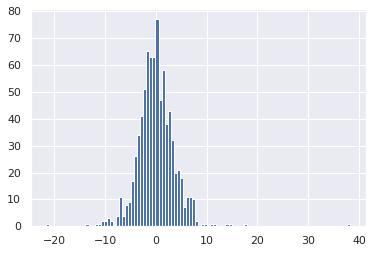

In [58]:
# Styl
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

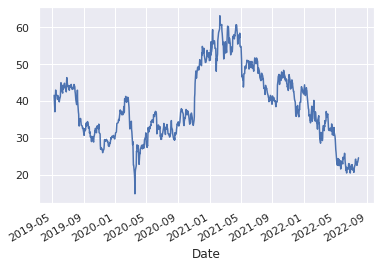

In [59]:
df.Close.plot()

# **Filtrowanie danych**

In [60]:
df

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2022-07-26,23.15,23.1500,22.450,22.55,24402801,22.850,23.35,-3.426124
2022-07-27,23.00,23.3199,22.490,23.09,28384348,23.045,22.55,2.394678
2022-07-28,22.89,23.4200,22.140,23.31,22886075,23.100,23.09,0.952793


In [63]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,4.141439
2019-05-24,41.28,41.5100,40.500,41.51,8786751,41.395,40.47,2.569805
2019-05-31,41.15,41.5700,39.410,40.41,23209848,40.780,39.80,1.532663
...,...,...,...,...,...,...,...,...
2022-07-25,23.27,23.5400,22.630,23.35,12923042,23.310,23.30,0.214592
2022-07-27,23.00,23.3199,22.490,23.09,28384348,23.045,22.55,2.394678
2022-07-28,22.89,23.4200,22.140,23.31,22886075,23.100,23.09,0.952793


In [64]:
df_positive.Daily_Change.mean()

2.7830918622656307

In [65]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-10.752947
2019-05-17,41.98,43.290,41.2700,41.91,20225687,41.945,43.00,-2.534884
2019-05-20,41.19,41.680,39.4600,41.59,29222330,41.390,41.91,-0.763541
2019-05-21,42.00,42.240,41.2500,41.50,10802851,41.750,41.59,-0.216398
2019-05-22,41.05,41.280,40.5000,41.25,9089469,41.150,41.50,-0.602410
...,...,...,...,...,...,...,...,...
2022-07-11,21.95,22.250,21.1400,21.19,17562117,21.570,22.34,-5.147717
2022-07-13,20.93,21.610,20.7200,21.50,18994916,21.215,21.57,-0.324525
2022-07-14,21.25,21.465,20.5905,20.65,31561675,20.950,21.50,-3.953488


In [66]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-07-26    False
2022-07-27    False
2022-07-28    False
2022-07-29    False
2022-08-01    False
Length: 813, dtype: bool

In [67]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,2.569805
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.483247
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,4.455446
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,1.278011


In [71]:
df[df.index > "2021-11-01"]

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2021-11-02,44.34,44.3500,42.3309,42.89,28002584,43.615,44.36,-3.313796
2021-11-03,45.33,46.2600,44.7100,45.72,38499594,45.525,42.89,6.598275
2021-11-04,45.54,46.5300,44.9900,45.27,31903047,45.405,45.72,-0.984252
2021-11-05,47.50,48.7400,46.6100,47.19,45641491,47.345,45.27,4.241219
2021-11-08,47.08,47.6450,45.8200,45.89,25257852,46.485,47.19,-2.754821
...,...,...,...,...,...,...,...,...
2022-07-26,23.15,23.1500,22.4500,22.55,24402801,22.850,23.35,-3.426124
2022-07-27,23.00,23.3199,22.4900,23.09,28384348,23.045,22.55,2.394678
2022-07-28,22.89,23.4200,22.1400,23.31,22886075,23.100,23.09,0.952793


In [73]:
df[(df.index >= "2019-11-01") & (df.index <= "2019-11-15")]

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.412698
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.924450
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-9.845560
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-3.854390
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,1.633259
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-1.351351
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.481303
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-1.621223
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.037453


In [76]:
df[(df.index == "2019-11-01") | (df.index == "2019-11-15")]

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.7,30.7412,31.37,10460430,31.410,31.50,-0.412698
2019-11-15,26.18,26.8,25.9550,26.79,41372771,26.485,25.99,3.078107


In [78]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-9.377628
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,2.273782
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,4.809437
